In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [34]:
data = pd.read_csv(r'C:\Users\Toshiba\Desktop\Gradient decent\House_price_competition\train.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [47]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
object_columns = [col for col in data.columns if data[col].dtype == 'object']
# Extract the object columns
object_data = data[object_columns]

# Print the names of object columns
print(object_data.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [34]:
# pip install category_encoders 

use target encoding as one of Mapping Categorical Features as One-Hot Encoding, Label Encoding

In [38]:
from category_encoders import TargetEncoder

te = TargetEncoder()

data_te = te.fit_transform(data[object_columns], y = data['SalePrice'])

#print(data_te)

Categorical Features: MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond,',YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'

In [39]:
numerical_cols = ['MSSubClass','LotFrontage','LotArea','OverallQual',
                  'OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                  'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
                  'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                  'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

# Concatenate the target-encoded DataFrame with the numerical columns
data_combined = pd.concat([data_te, data[numerical_cols]], axis=1)

print(data_combined)

           MSZoning         Street          Alley       LotShape  \
0     191004.994787  181130.538514  183452.131483  164754.818378   
1     191004.994787  181130.538514  183452.131483  164754.818378   
2     191004.994787  181130.538514  183452.131483  206101.665289   
3     191004.994787  181130.538514  183452.131483  206101.665289   
4     191004.994787  181130.538514  183452.131483  206101.665289   
...             ...            ...            ...            ...   
1455  191004.994787  181130.538514  183452.131483  164754.818378   
1456  191004.994787  181130.538514  183452.131483  164754.818378   
1457  191004.994787  181130.538514  183452.131483  164754.818378   
1458  191004.994787  181130.538514  183452.131483  164754.818378   
1459  191004.994787  181130.538514  183452.131483  164754.818378   

        LandContour     Utilities      LotConfig      LandSlope  \
0     180183.746758  180950.95682  176938.047529  179956.799566   
1     180183.746758  180950.95682  178122.652042 

In [40]:
data_combined.isna().sum().sum()

348

In [41]:
data_combined.isna().sum()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 80, dtype: int64

In [42]:
NA_columns = [col for col in data_combined if data_combined[col].isna().any()]
# Extract the object columns
NA_data = data_combined[NA_columns]

# Print the names of object columns
print(NA_data.columns)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [43]:
# Fill NaN values with the mean (or other imputation method)
LotFrontage_mean = data_combined['LotFrontage'].mean()
data_combined['LotFrontage'] = data_combined['LotFrontage'].fillna(LotFrontage_mean)

MasVnrArea_mean = data_combined['MasVnrArea'].mean()
data_combined['MasVnrArea'] = data_combined['MasVnrArea'].fillna(MasVnrArea_mean)

GarageYrBlt_mean = data_combined['GarageYrBlt'].mean()
data_combined['GarageYrBlt'] = data_combined['GarageYrBlt'].fillna(GarageYrBlt_mean)



In [46]:
# Save modified dataset to csv file
data_combined.to_csv("modified_house_price.csv", index=False)

In [50]:
# Create a StandardScaler object
scaler = StandardScaler()

data_combined.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']] = scaler.fit_transform(data_combined[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']])

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_13760\2018153990.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.07337496 -0.87256276  0.07337496 ...  0.30985939 -0.87256276
 -0.87256276]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_combined.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_13760\2018153990.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.20714171 -0.09188637  0.07347998 ... -0.14781027 -0.08016039
 -0.05811155]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_combined.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_13760\2018153990.py:4: FutureWarning: Setting an item of incompatible dtyp

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

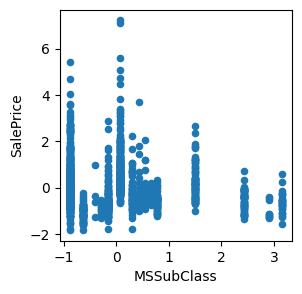

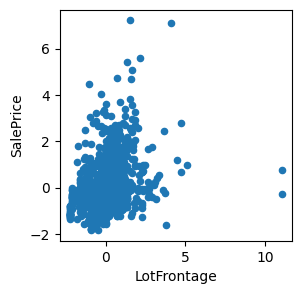

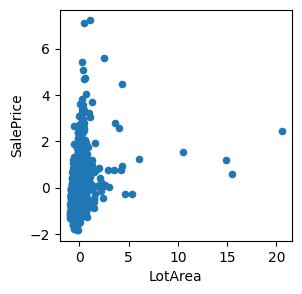

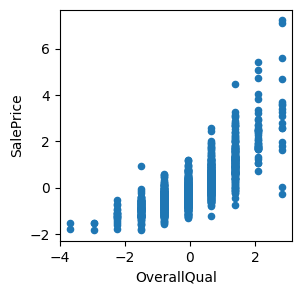

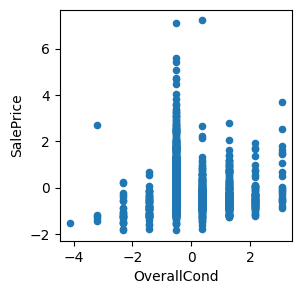

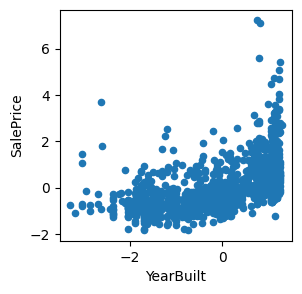

In [52]:
# draw some features with lable "SalePrice" in scatter

data_combined.plot(kind = 'scatter',x = 'MSSubClass', y = 'SalePrice',figsize=(3,3))
data_combined.plot(kind = 'scatter',x = 'LotFrontage', y = 'SalePrice',figsize=(3,3))
data_combined.plot(kind = 'scatter',x = 'LotArea', y = 'SalePrice',figsize=(3,3))
data_combined.plot(kind = 'scatter',x = 'OverallQual', y = 'SalePrice',figsize=(3,3))
data_combined.plot(kind = 'scatter',x = 'OverallCond', y = 'SalePrice',figsize=(3,3))
data_combined.plot(kind = 'scatter',x = 'YearBuilt', y = 'SalePrice',figsize=(3,3))


In [53]:
#define features in X ans Label in y

X=data_combined[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']].values
y=data_combined['SalePrice'].values

In [54]:
# Assuming you have data in X (features) and y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [56]:
# create two model for regression
model_linear_regressor = LinearRegression()
model_Random_Forest = RandomForestRegressor()

In [57]:
model_linear_regressor.fit(X_train,y_train)
model_Random_Forest.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
# Make predictions
y_pred_linear_reg = model_linear_regressor.predict(X_test)
y_pred_Random_Forest = model_Random_Forest.predict(X_test)

In [61]:
# evaluate the two models mean_squared_error, r2_score
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("MSE_linear_reg:", mse_linear_reg)
print("R-squared_linear_reg:", r2_linear_reg)

MSE_linear_reg: 0.1580250955942391
R-squared_linear_reg: 0.8700666904937325


In [62]:

mse_Random_Forest = mean_squared_error(y_test, y_pred_Random_Forest)
r2_Random_Forest = r2_score(y_test, y_pred_Random_Forest)
print("MSE_Random_Forest:", mse_Random_Forest)
print("R-squared_Random_Forest:", r2_Random_Forest)

MSE_Random_Forest: 0.13095679666262613
R-squared_Random_Forest: 0.8923231153334948


In [63]:
# make final prediction with weighted average of many algorithims as avarage and max voting classifier in sklearn.ensemble import VotingClassifier
# model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
finalpred=(y_pred_Random_Forest*0.5+y_pred_Random_Forest*0.5)

Common Metrics:

Regression Models:
Mean squared error (MSE): Measures the average squared difference between predicted and actual values.
Root mean squared error (RMSE): The square root of MSE, providing a more interpretable measure.   
R-squared (R²): Indicates the proportion of variance in the target variable explained by the model.

Classification Models:

Accuracy: The percentage of correct predictions.
Precision: The proportion of positive predictions that are actually positive.
Recall: The proportion of actual positive cases that are correctly predicted as positive.   
F1-score: The harmonic mean of precision and recall, balancing both metrics.